# Исследование компьютерных игр

_____
**Описание исследования.**
Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры, нужно провести исследования компьютерных игр.

_____
**Цель исследования.**
    
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
_____
**Задачи исследования.**

- Изучить как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами и постройте распределение по годам;
- Понять какие платформы лидируют по продажам. Выбрать несколько потенциально прибыльных платформ;
- Определить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
- Изучить общее распределение игр по жанрам;
- Составить портрет пользователя каждого региона;
- Проверить гипотезы:
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

_____
**Исходные данные.**
    
- Таблица с информацией о продажах игр.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('games.csv')

In [2]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Описание данных:  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
- Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.


В столбце оценка пользователей встречается значение `tbd`: TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято.

## Предобработка данных

### Заменим названия столбцов (приведем к нижнему регистру):

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Заполним пропуски

In [5]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

 У нас есть два пропуска в столбце название игры и жанр игры. Их очень мало оставим эти пропуски.  
 А пропуски в столбце год выпуска заполним нулем. При необходимости будем фильтровать по значению.

In [6]:
data['year_of_release'] = data['year_of_release'].fillna(0)
'Пропуски после:', data['year_of_release'].isna().sum()

('Пропуски после:', 0)

Пропуски в столбцах с рейтингом игр, оценками пользователей и критиков заполнить не получиться. Оценки игр это субъективные данные. А рейтинг игры это значение, присваиваемое конкретной организацией, которое должно быть точно определено.

В столбце рейтинг ESRB заменим пропуски на значение "unknown" (неизвестно), так как в данном случае значения категориальные, а пропуски полностью случайные. 

In [7]:
data['rating'] = data['rating'].fillna("unknown")

In [8]:
data['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

### Замена типа данных

In [9]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

В столбце оценка пользователей встречается значение `tbd`. То есть для части игр оценка пользователя еще не определена.

In [10]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Чтобы преобразовать данные в столбце в числовые нам необходимо заменить текстовые значения на число. Так как оценка пользователей не может быть меньше нуля, то заменим текстовые значения на "-1". В дальнейшем при необходимости сможем фильтровать эти значения.

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')

Год выпуска игры должен быть целым числом. Заменим также тип данных в этом солбце.

In [12]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [13]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Поиск дубликатов

Посмотрим есть ли дубликаты по строкам таблицы.

In [14]:
data.duplicated().sum()

0

Проверим дубликаты в названии игр.

In [15]:
data['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [16]:
data.query('name == "FIFA 14"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.00,4.30,E
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.00,4.20,E
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.00,6.30,E
1753,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.00,5.80,E
4699,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.80,E
4809,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.00,4.60,E
4985,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.30,E
6871,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,unknown
7875,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.40,E


Мы видим что одна игра может выпускаться на разных платформах и также могут выходит дополнительные релизы в другие годы.

Проверим дубликаты в столбцах Платформа и Жанр игры.

In [17]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Проверим есть ли дубликаты по столбцам название игры, платформа и год выпуска. 

In [19]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.00,5.50,E


Нашлось две строки. Удалим дубликаты.

In [20]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

### Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец

In [21]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы.**

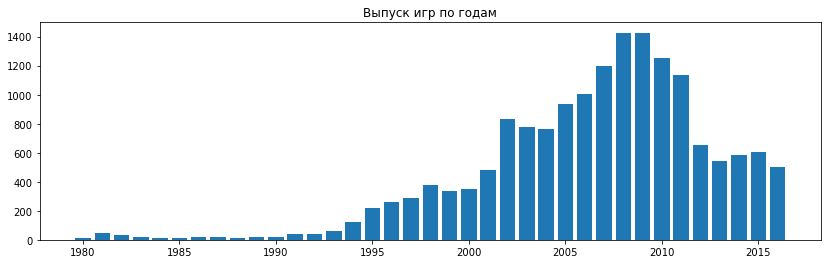

In [22]:
count_ears = data.query('year_of_release != 0').groupby('year_of_release')['year_of_release'].count()
plt.figure(figsize=(14,4))
plt.bar(count_ears.index,count_ears)
plt.title('Выпуск игр по годам')
plt.show()

Мы видим что пик выпуска игр приходится на период с 2002 по 2011 года. Возможно, спад в индустрии связан с ростом популярности онлайн игр, а также мобильных игр.  
  
  
Выберем платформы с наибольшими суммарными продажами.

In [23]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5)

platform
PS2    1255.77
X360    971.42
PS3     939.64
Wii     907.51
DS      806.12
Name: total_sales, dtype: float64

Посмотрим как менялись продажи по этим платформам по годам.

In [24]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5).index

In [25]:
df_sales = data.query('platform in @top_platforms and year_of_release != 0').pivot_table(index=['platform', 'year_of_release'], 
                                                                values='total_sales', aggfunc='sum').reset_index()
df_sales.head(5) #построим сводную таблицу продаж платформ по годам

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


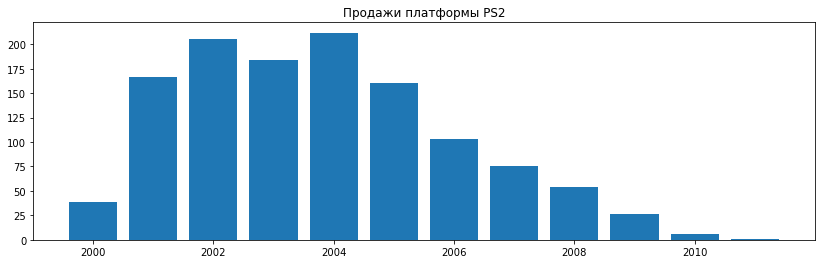

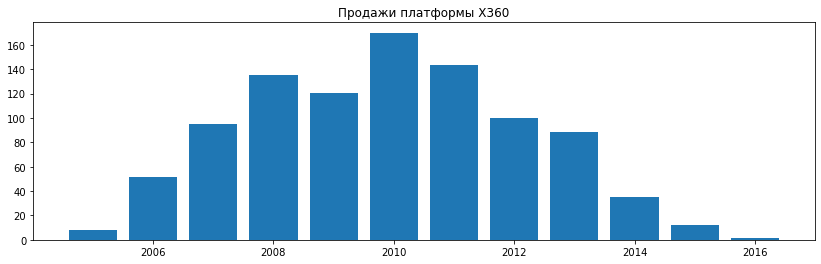

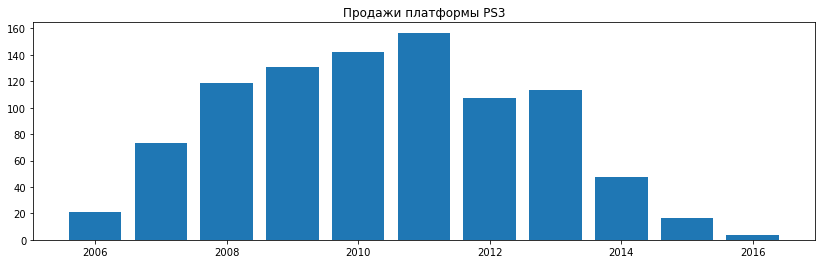

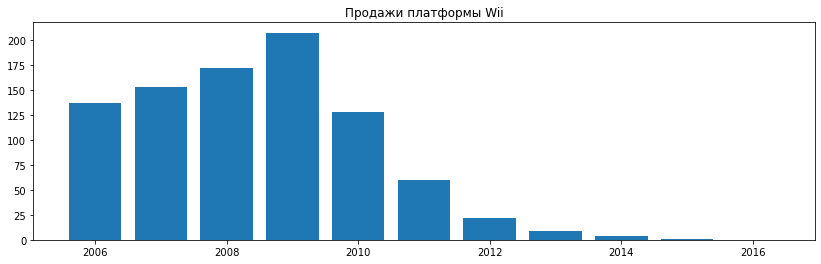

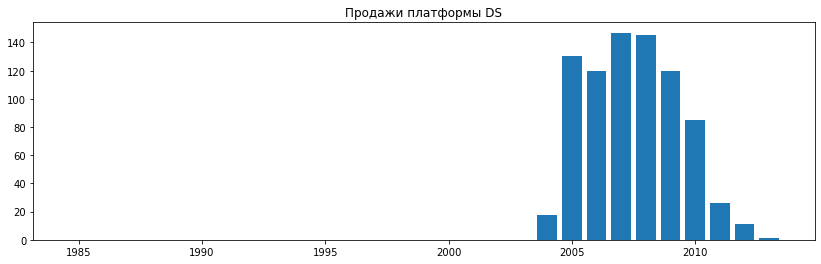

In [26]:
for platform in top_platforms:
    line = df_sales[df_sales['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    fig, ax = plt.subplots(figsize=(14,4))
    ax.bar(line.index, line) 
    ax.set(title = f'Продажи платформы {platform}')
    plt.show()

Посчитаем средний срок продаж по каждой платформе

In [27]:
df_sales.groupby('platform')['year_of_release'].count().mean()  #query('total_sales isna')

11.4

Мы видим что каждая платформа переживает рост и падение. И в среднем живет около 11 лет. Активный рост длится примерно 4-6 лет.  
  
Для построения прогноза мы возьмем срок 5 лет, то есть определим актуальный период с 2012 по 2016 включительно.  

In [28]:
df = data.query('year_of_release > 2011')

Выделим какие платформы лидируют по продажам за актуальный период.

In [29]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5)

platform
PS4    314.14
PS3    288.78
X360   236.54
3DS    194.61
XOne   159.32
Name: total_sales, dtype: float64

In [30]:
top_platforms_last = df.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5).index

Посмотрим на динамику продаж платформ за 5 лет.

In [31]:
df_sales_last = df.query('platform in @top_platforms_last').pivot_table(index=['platform', 'year_of_release'], 
                                                                values='total_sales', aggfunc='sum').reset_index()
df_sales_last.head() #построим сводную таблицу продаж платформ по годам

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


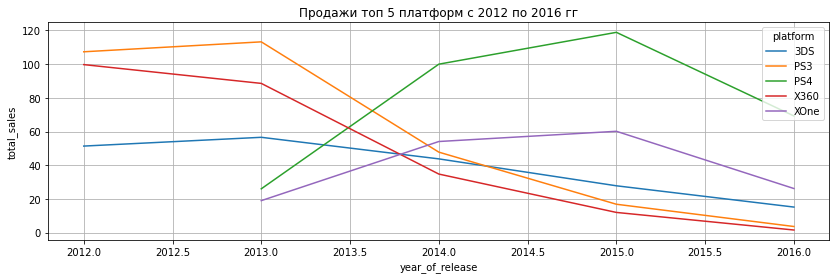

In [32]:
plt.figure(figsize=(14,4))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=df_sales_last)
plt.grid()
plt.title('Продажи топ 5 платформ с 2012 по 2016 гг')
plt.show()

По всем платформам идет снижение продаж. Но снижение продаж по платформам PS4 и XOne началось только после 2015 года, а продажи по другим платформам снижаются с 2013 года.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

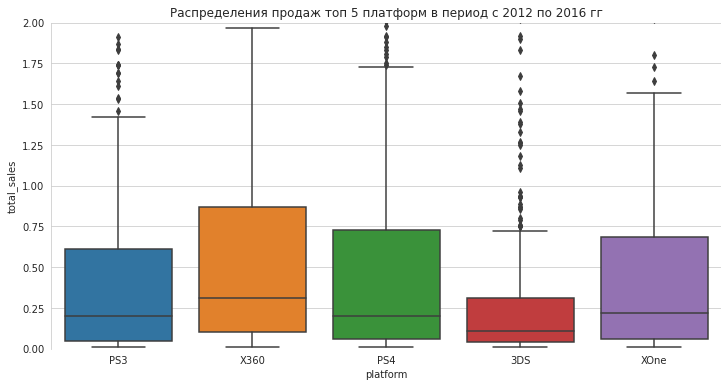

In [33]:
plt.figure(figsize=(12,6))
with sns.axes_style(style='whitegrid'):
    sns.boxplot(x='platform', y='total_sales', data=df.query('platform in @top_platforms_last'))
    sns.despine(bottom=True)
plt.ylim(0, 2)
plt.title('Распределения продаж топ 5 платформ в период с 2012 по 2016 гг')
plt.show()

Мы видим что распределение глобальных продаж платформы Х360 выделяется на фоне остальных платформ. А именно 75% значений продаж этой платформы выше остальных и медиана больше. Мы можем выделить платформы X360, PS4, XOne как потенциально прибыльные.  
мы можем говорить, что самые популярные игры за этот период в основном продавались на платформах X360, PS4, XOne. На остальных платформах менее продоваемые игры.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

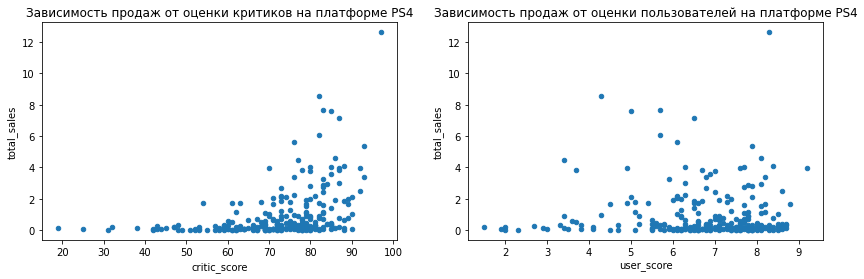

In [34]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', ax=ax1)
df.query('platform == "PS4" and user_score > 0').plot(x='user_score', y='total_sales', kind='scatter', ax=ax2)
ax1.set(title = 'Зависимость продаж от оценки критиков на платформе PS4')
ax2.set(title = 'Зависимость продаж от оценки пользователей на платформе PS4')
plt.show()

In [35]:
df.loc[(data['platform'] == "PS4") & (data['user_score'] > 0),['critic_score', 'user_score']].corrwith(data['total_sales'])

critic_score    0.41
user_score     -0.03
dtype: float64

Как видно на графике и судя по коэффициенту корреляции связь между оценкой критиков и продажами слабая. А влияние оценки пользователей на продажи практически отсутсвует, связь очень слабая.

А теперь посмотрим как влияют оценки на продажи в целом по всем платформам.

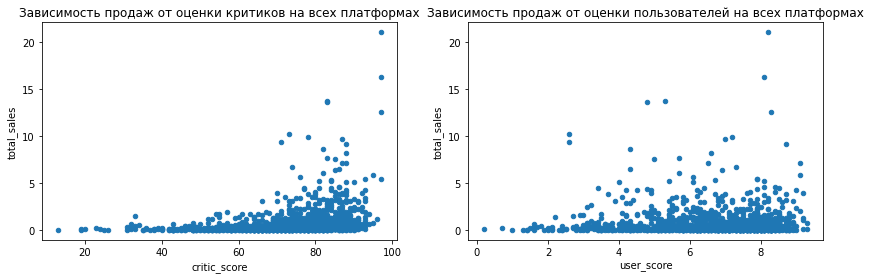

In [36]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax1)
df.query('user_score > 0').plot(x='user_score', y='total_sales', kind='scatter', ax=ax2)
ax1.set(title = 'Зависимость продаж от оценки критиков на всех платформах')
ax2.set(title = 'Зависимость продаж от оценки пользователей на всех платформах')
plt.show()

In [37]:
df.loc[data['user_score'] > 0,['critic_score', 'user_score']].corrwith(data['total_sales'])

critic_score   0.31
user_score     0.00
dtype: float64

По всем остальным платформам картина аналогичная влияние оценок на продажи слабое.

**Рассмотрим распределение игр по жанрам**

In [38]:
df_genre = df.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count']).reset_index()
df_genre.columns = ['genre','sum_sales', 'games_count']
df_genre = df_genre.sort_values(by='sum_sales', ascending = False)
df_genre

,genre,sum_sales,games_count
0,Action,441.12,1031
8,Shooter,304.73,235
7,Role-Playing,192.80,370
10,Sports,181.06,267
3,Misc,85.04,192
4,Platform,61.00,85
6,Racing,53.50,115
2,Fighting,44.49,109
9,Simulation,35.12,80
1,Adventure,29.43,302


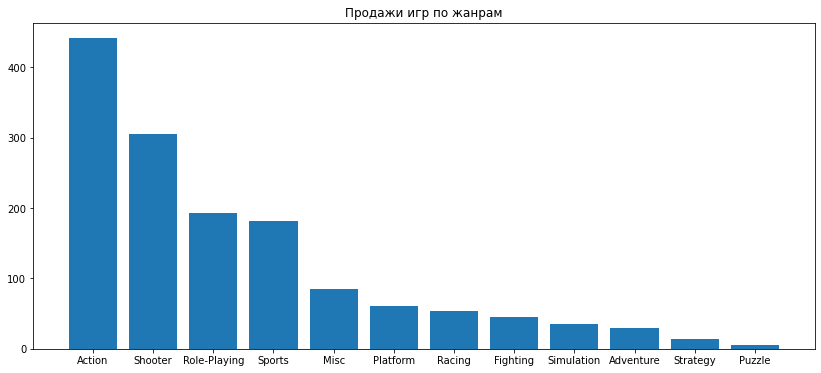

In [39]:
plt.figure(figsize=(14,6))
plt.bar(df_genre['genre'], df_genre['sum_sales'])
plt.title('Продажи игр по жанрам')
plt.show()

Самый популярный и прибыльный жанр Action. Также пользуются спросом Shooter, Role-Playing, Sports. Доля 4 популярных жанров составляет 77% всех продаж. Остальные жанры занимают долю не больше 6%. Наименее продаваемый жанр Puzzle его продажи почти в 100 раз меньше, чем продажи жанра Action.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP): самые популярные платформы и жанры игр (топ-5).

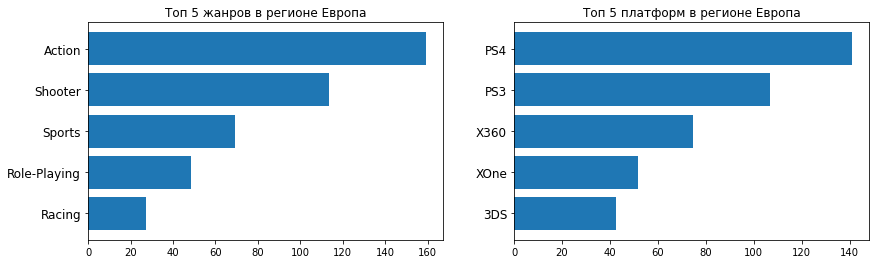

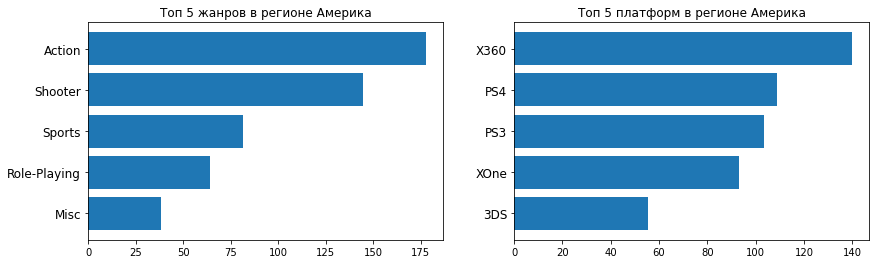

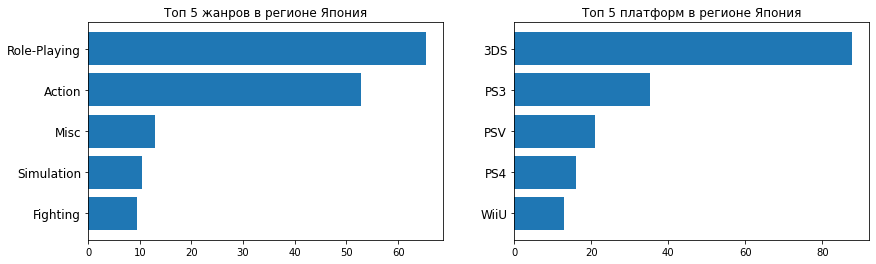

In [40]:
regions = {'eu_sales': 'Европа', 'na_sales': 'Америка', 'jp_sales':'Япония'}
for region in regions:
    genre_sal = df.pivot_table(index='genre', values=region, aggfunc='sum').reset_index().sort_values(by=region, ascending = False).head().sort_values(by=region)
    platform_sal = df.pivot_table(index='platform', values=region, aggfunc='sum').reset_index().sort_values(by=region, ascending = False).head().sort_values(by=region)
    
    fig = plt.figure(figsize=(14,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.set_yticklabels(genre_sal['genre'], fontsize=12)
    ax2.set_yticklabels(platform_sal['platform'], fontsize=12)
    ax1.barh(genre_sal['genre'], genre_sal[region])
    ax2.barh(platform_sal['platform'], platform_sal[region])
    
    ax1.set(title = f'Топ 5 жанров в регионе {regions[region]}')
    ax2.set(title = f'Топ 5 платформ в регионе {regions[region]}')
    plt.show()

Мы видим, что пользователи северной Америки и Европы похожи. Они предпочитают практически одни и те же жанры игр. А также в этих регионах предпочитают одни и те же платформы, только в северной Америке на первом месте Х360, а в Европе PS4. А вот в Японии пользователи отличаются. Если в Европе и сев. Америке на первом месте Action, Shooter, Sports, то в Японии на первом месте жанр Role-Playing и Action. А вот жанры Shooter, Sports в Японии не популярны, их нет в топ 5. В Японии предпочитают играть на платформе 3DS.

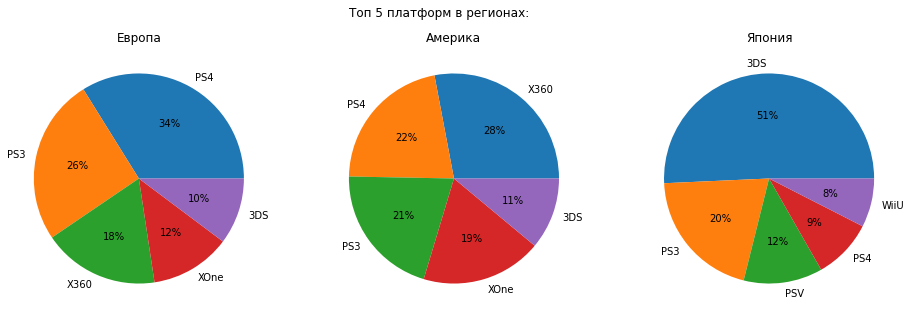

In [41]:
eu_platform = df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending = False).head()
na_platform = df.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending = False).head()
jp_platform = df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending = False).head()
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.pie(eu_platform['eu_sales'], labels = eu_platform['platform'],autopct='%.0f%%')
ax2.pie(na_platform['na_sales'], labels = na_platform['platform'], autopct='%.0f%%')
ax3.pie(jp_platform['jp_sales'], labels = jp_platform['platform'], autopct='%.0f%%')
ax1.title.set_text('Европа')
ax2.title.set_text('Америка')
ax3.title.set_text('Япония')
fig.suptitle('Топ 5 платформ в регионах:')
plt.show()

Если посмотрим на доли продаж по платформам в 3-х регионах, то заметим что в Японии платформа 3DS занимает более 50% продаж. В то время как в сев.Америке и Европе доли платформ распределены более равномерно, т.е. конкуренция платформ здесь выше.

**Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.**

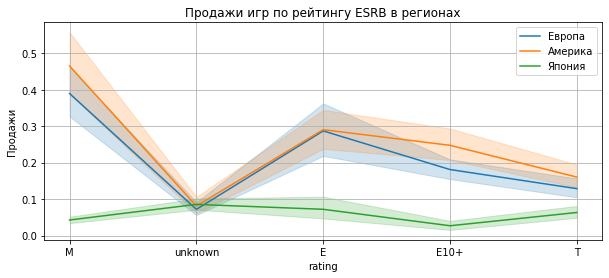

In [42]:
plt.figure(figsize=(10,4))
for region in regions:
    ax = sns.lineplot(x='rating', y=region, data=df)        
ax.set_ylabel('Продажи')
ax.set_title('Продажи игр по рейтингу ESRB в регионах')
ax.legend(['Европа', 'Америка','Япония'])
plt.grid()
plt.show()

На графике мы видим, что продажи игр с рейтингом `М` (для взрослых) в Европе и сев.Америке выше, чем продажи игр с другими рейтингами. В Японии продажи игр с разными рейтингами так сильно не отличаются.

## Проверка гипотез

### Двустороняя проверка: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковы}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Подготовим две выборки. Пользовательские рейтинги платформ Xbox One и PC

In [43]:
score_xone = df.query('platform == "XOne" and user_score > 0')['user_score']
score_pc = df.query('platform == "PC" and user_score > 0')['user_score']

In [44]:
alpha = .05

results = st.ttest_ind(score_xone, score_pc)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Можно сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC принципиально не отличаются.

### Двустороння проверка: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports одинаковы}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

Подготовим две выборки. Пользовательские рейтинги жанров Action и Sports.

In [45]:
score_action = df.query('genre == "Action" and user_score > 0')['user_score']
score_sports = df.query('genre == "Sports" and user_score > 0')['user_score']

In [46]:
alpha = .05

results = st.ttest_ind(score_action, score_sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.804523380462917e-26
Отвергаем нулевую гипотезу


Вероятность что средние пользовательские рейтинги жанров равны слишком мала. Поэтому можем сказать что средние оценки пользователей жанров Action и Sports разные.

## Общий вывод

Мы проанализировали исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы.   
Анализ позволяет сделать следующие выводы.  
За последние 5 лет по глобальным продажм лидируют следующие платформы PS4, PS3, X360, 3DS, XOne. Среди жанров выделяются Action, Shooter, Role-Playing, Sports. Следует отметить, что в Японии предпочтения пользователей отличаются от общемировых. В этом регионе доминирует платформа 3DS, а самые популярные жанры Role-Playing и Action. 
Также мы выяснили что оценки критиков и пользователей практически не влияют на продажи, вне зависимости от платформ.  
Определили что средние пользовательские рейтинги платформ Xbox One и PC принципиально не отличаются. А средние оценки пользователей жанров Action и Sports разные.  
Таким образом мы можем направить свое внимание на выделенные платформы и игры определенных выше жанров, но с учетом региональных оссобенностей.